# Importing Libraries

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [23]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels

In [25]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays

In [ ]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

# Splitting training and testing dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting the labels into one hot encoding

In [7]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building Model

In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu',))

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(rate =0.25))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(rate =0.25))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dropout(rate =0.5))

In [18]:
cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))

# Training the CNN Model

In [19]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
Model = cnn.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 90s 92ms/step - loss: 2.0957 - accuracy: 0.4767 - val_loss: 0.5936 - val_accuracy: 0.8535
Epoch 2/20
981/981 [==============================] - 92s 93ms/step - loss: 0.6876 - accuracy: 0.7924 - val_loss: 0.2541 - val_accuracy: 0.9276
Epoch 3/20
981/981 [==============================] - 90s 91ms/step - loss: 0.4510 - accuracy: 0.8631 - val_loss: 0.1215 - val_accuracy: 0.9736
Epoch 4/20
981/981 [==============================] - 87s 89ms/step - loss: 0.3479 - accuracy: 0.8968 - val_loss: 0.1172 - val_accuracy: 0.9719
Epoch 5/20
981/981 [==============================] - 87s 89ms/step - loss: 0.2868 - accuracy: 0.9166 - val_loss: 0.0925 - val_accuracy: 0.9779
Epoch 6/20
981/981 [==============================] - 85s 87ms/step - loss: 0.2562 - accuracy: 0.9266 - val_loss: 0.0647 - val_accuracy: 0.9833
Epoch 7/20
981/981 [==============================] - 90s 91ms/step - loss: 0.2439 - accuracy: 0.9333 - val_loss: 0.0752 - val_accuracy:

# Plotting graphs for accuracy

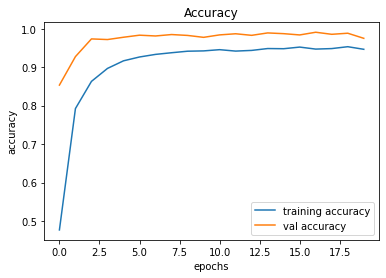

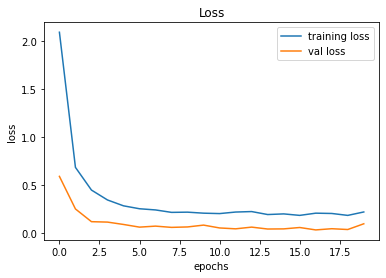

In [24]:
plt.figure(0)
plt.plot(Model.history['accuracy'], label='training accuracy')
plt.plot(Model.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot( Model.history['loss'], label='training loss')
plt.plot(Model.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy on test dataset

In [30]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(cnn.predict(X_test), axis=-1)

# Accuracy with the test data

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9293745051464767


In [1]:
cnn.save('Traffic Sign Classifier.h5')

NameError: name 'cnn' is not defined